In [1]:
#Import some importants libraries
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the data
df_recommender = pd.read_csv("pre4-cols-colorname-full.csv",sep=";", encoding="utf-8")

#Get data size and the head
print(df_recommender.shape)
df_recommender.head()

/Users/jorge.martinez/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(152734, 54)


SKU_ID PRODUCT_ID                         PRODUCT_NAME PRODUCT_GENDER  \
0  10000067   10000064  Chaqueta Mujer W Metropolis Parka I          Mujer   
1  10000074   10000064  Chaqueta Mujer W Metropolis Parka I          Mujer   
2  10000814   10000811                     Pack 3 Pantaleta          Mujer   
3  10000816   10000812                       Pack 3 Culotte          Mujer   
4  10000818   10000811                     Pack 3 Pantaleta          Mujer   

                CATEGORY              CATEGORY_1    CATEGORY_2  \
0  "Sostenes Deportivos"  "Ropa Deportiva Mujer"  "Moda Mujer"   
1  "Sostenes Deportivos"  "Ropa Deportiva Mujer"  "Moda Mujer"   
2        "Pack Calzones"              "Calzones"     "Palmers"   
3        "Pack Calzones"              "Calzones"     "Palmers"   
4        "Pack Calzones"              "Calzones"     "Palmers"   

                      CATEGORY_3 CATEGORY_4 CATEGORY_5  ...  \
0  "Parkas y Cortavientos Mujer"        NaN        NaN  ...   
1  "Parkas y Cortavientos Mujer"        NaN        NaN  ...   
2                            NaN        NaN        NaN  ...   
3                            NaN        NaN        NaN  ...   
4                            NaN        NaN        NaN  ...   

  PRODUCT_ATTR_FORMATO PRODUCT_ATTR_MODELO      PRODUCT_ATTR_TIPO  \
0                  NaN      CHAQUETA MUJER              Chaquetas   
1                  NaN      CHAQUETA MUJER              Chaquetas   
2                  NaN               P3614  Calzón pack pantaleta   
3                  NaN               P3615   Calzón pack colaless   
4                  NaN               P3614  Calzón pack pantaleta   

                          VARIANT_NAME VARIANT_ATTR_COLOR_GROUP  \
0  Chaqueta Mujer W Metropolis Parka I                    Negro   
1  Chaqueta Mujer W Metropolis Parka I                    Negro   
2    PACK 3 PANTALETA MICROFIBRA P3614                   Morado   
3      PACK 3 CULOTTE MICROFIBRA P3615                   Rosado   
4    PACK 3 PANTALETA MICROFIBRA P3614                   Morado   

  VARIANT_ATTR_SIZE VARIANT_SELLER_ID PRICE_NORMAL_DEFAULT  \
0                 l             KOMAX               249990   
1                 m             KOMAX               249990   
2                 s         FALABELLA                 9990   
3                 s         FALABELLA                 9990   
4                 m         FALABELLA                 9990   

                                  ALL_PRODUCT_VALUES colors  
0  OTRO_ORIGEN Deportivo Regular Mujer Manga larg...    NaN  
1  OTRO_ORIGEN Deportivo Regular Mujer Manga larg...    NaN  
2  61% Poliamida , 39% Elastano Pack de 3 Liso Li...    NaN  
3  61% Poliamida - 39% Elastano Pack de 3 Liso Mu...    NaN  
4  61% Poliamida - 39% Elastano Pack de 3 Liso Mu...    NaN  

[5 rows x 54 columns]

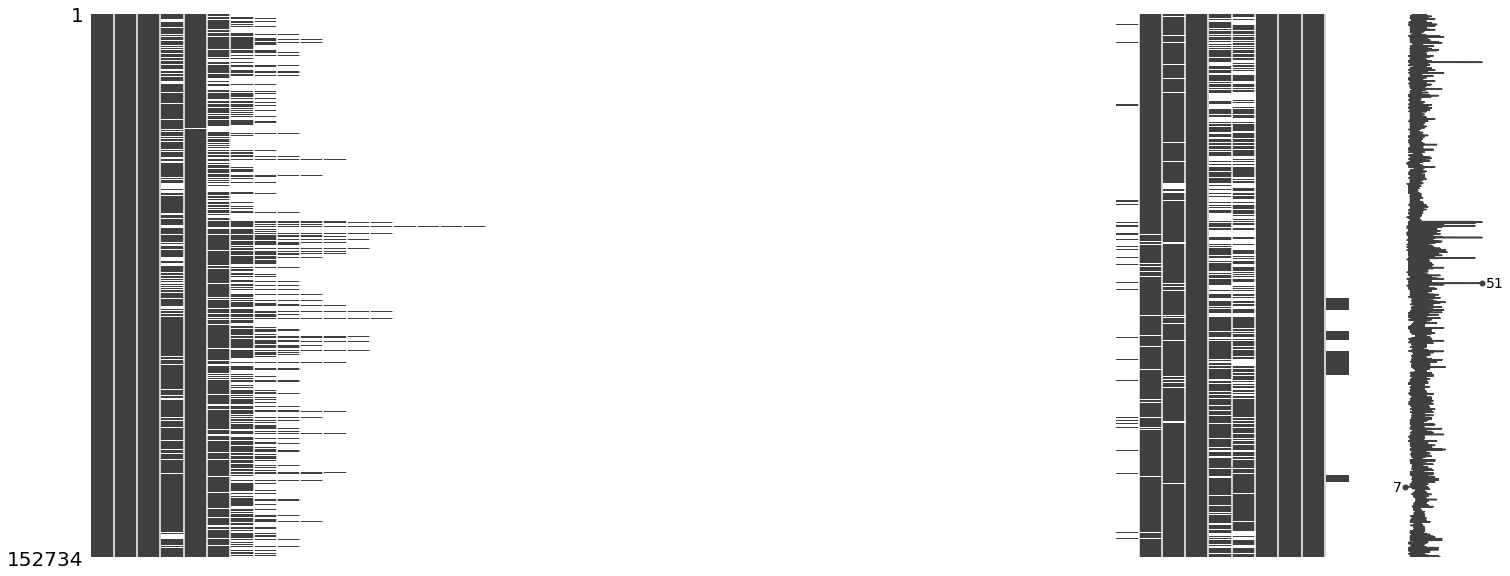

In [3]:
#See the missing data in plot
msno.matrix(df_recommender)

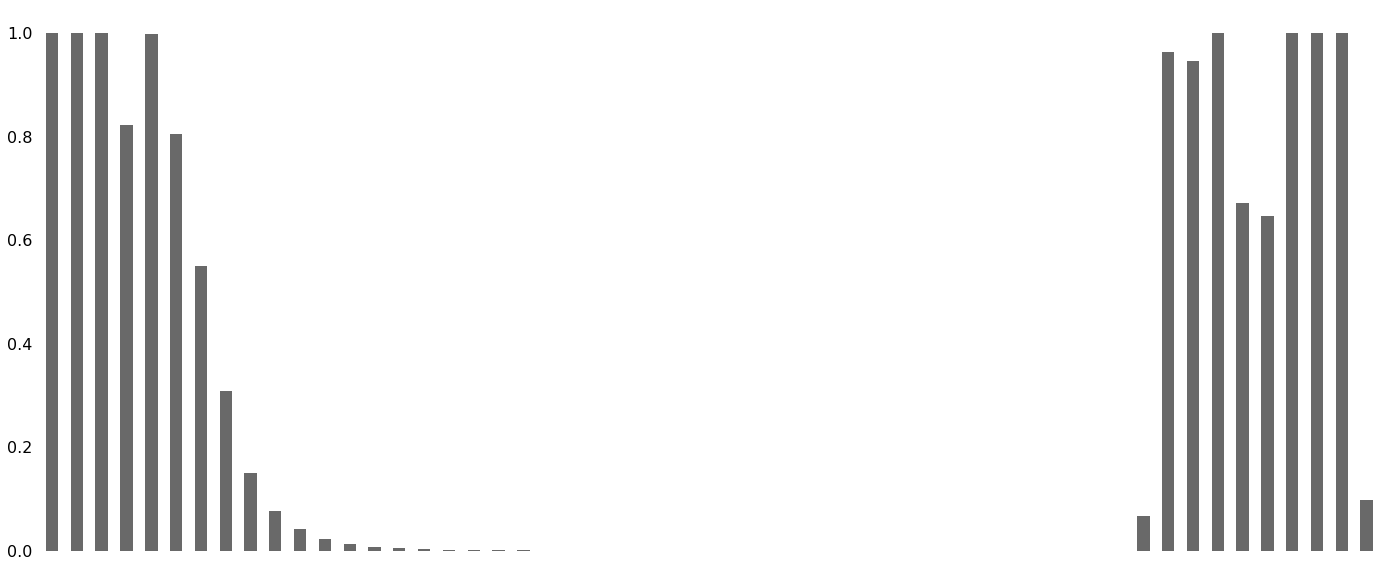

In [4]:
#Same here
msno.bar(df_recommender)

In [5]:
#See the columns
df_recommender.columns

Index(['SKU_ID', 'PRODUCT_ID', 'PRODUCT_NAME', 'PRODUCT_GENDER', 'CATEGORY',
       'CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'CATEGORY_5',
       'CATEGORY_6', 'CATEGORY_7', 'CATEGORY_8', 'CATEGORY_9', 'CATEGORY_10',
       'CATEGORY_11', 'CATEGORY_12', 'CATEGORY_13', 'CATEGORY_14',
       'CATEGORY_15', 'CATEGORY_16', 'CATEGORY_17', 'CATEGORY_18',
       'CATEGORY_19', 'CATEGORY_20', 'CATEGORY_21', 'CATEGORY_22',
       'CATEGORY_23', 'CATEGORY_24', 'CATEGORY_25', 'CATEGORY_26',
       'CATEGORY_27', 'CATEGORY_28', 'CATEGORY_29', 'CATEGORY_30',
       'CATEGORY_31', 'CATEGORY_32', 'CATEGORY_33', 'CATEGORY_34',
       'CATEGORY_35', 'CATEGORY_36', 'CATEGORY_37', 'CATEGORY_38',
       'CATEGORY_39', 'PRODUCT_ATTR_FORMATO', 'PRODUCT_ATTR_MODELO',
       'PRODUCT_ATTR_TIPO', 'VARIANT_NAME', 'VARIANT_ATTR_COLOR_GROUP',
       'VARIANT_ATTR_SIZE', 'VARIANT_SELLER_ID', 'PRICE_NORMAL_DEFAULT',
       'ALL_PRODUCT_VALUES', 'colors'],
      dtype='object')

In [6]:
#Drop this column, because the data its almost all missing 
del df_recommender['PRODUCT_ATTR_FORMATO']

In [7]:
df_recommender_falabella = df_recommender.copy()
#Select just product from Falabella
#df_recommender_falabella = df_recommender[df_recommender.VARIANT_SELLER_ID == 'FALABELLA']

In [8]:
#See the size of Falabella Dataframe
df_recommender_falabella.shape

(152734, 53)

In [9]:
df_recommender.dtypes

SKU_ID                      object
PRODUCT_ID                  object
PRODUCT_NAME                object
PRODUCT_GENDER              object
CATEGORY                    object
CATEGORY_1                  object
CATEGORY_2                  object
CATEGORY_3                  object
CATEGORY_4                  object
CATEGORY_5                  object
CATEGORY_6                  object
CATEGORY_7                  object
CATEGORY_8                  object
CATEGORY_9                  object
CATEGORY_10                 object
CATEGORY_11                 object
CATEGORY_12                 object
CATEGORY_13                 object
CATEGORY_14                 object
CATEGORY_15                 object
CATEGORY_16                 object
CATEGORY_17                 object
CATEGORY_18                 object
CATEGORY_19                 object
CATEGORY_20                 object
CATEGORY_21                 object
CATEGORY_22                 object
CATEGORY_23                 object
CATEGORY_24         

In [10]:
df_recommender.VARIANT_SELLER_ID.unique().shape

(1793,)

In [11]:
# Get the distribution by VARIANT_SELLER_ID
df_recommender.VARIANT_SELLER_ID.value_counts()

FALABELLA                              63784
CALAMBUR EIRL                           3109
BAZIANI                                 2046
H2O WEAR                                1818
ESTABL. COMERCIALES CALIFORNIA S.A.     1166
                                       ...  
HOBBYCENTER CHILE                          1
COMERCIAL  VENTA  EXPRESS SPA              1
industrial pac ltda                        1
Vitrina Carioca                            1
BOMBUKIDS                                  1
Name: VARIANT_SELLER_ID, Length: 1792, dtype: int64

In [12]:
df_recommender.PRODUCT_ATTR_TIPO.unique().shape

(749,)

In [13]:
#See the VARIANT_ATTR_SIZE uniques values
df_recommender_falabella.VARIANT_ATTR_SIZE.unique()

array(['l', 'm', 's', 'xl', '34b', '36b', '38b', '34c', '36c', '38c',
       '40c', '36d', '38d', '40d', 'Oct-13', nan, 'xxl', '32', '34', '36',
       '38', '30', '28', '6 meses', '12 meses', '24 meses', '25-27',
       '22-24', '2', '8', '4', '6', '10', '12', '14', 'xs', '1', '03-Apr',
       '16', '1m', '15-18', '9', 'tu', '5', '39-41', '36-38', '32b',
       '32c', '32a', '0 meses', '3 meses', '18 meses', '3', '36 meses',
       '75', '9 meses', '40b', '42b', '42c', '34d', '42d', '40-41',
       '37-39', '34-36', 'Sep-13', '41-43', 'm/l', '32d', '34e', '36e',
       '38e', '40', '7', '55', '85', '90', '95', '42', '44', '46',
       '35-37', '27', '29', '26', '31', '120', '130', 'xxxl', '39', '41',
       '43', '45', '105', '48', '50', '52', '15', '54', '56', '17',
       '15.5', '16.5', '17.5', '40e', '42e', '44e', '32f', '38f', '40f',
       '34f', '36f', '42f', '100', '15,5', '24', '18', '16,5', '17,5',
       '58', '60', '44-46', '05-Jun', '07-Aug', '42-43', '11', '9m',
       '

In [14]:
#Get unique gender values
df_recommender_falabella.PRODUCT_GENDER.unique()

array(['Mujer', 'Hombre', 'Unisex', nan, 'Libros infantiles', 'Niño',
       'Niña', 'Infantil', 'Arte y diseño'], dtype=object)

In [15]:
#Drop duplicates rows
df_recommender_falabella = df_recommender_falabella.drop_duplicates()

In [16]:
df_recommender_falabella.shape

(152734, 53)

In [17]:
#Null values in DataFrame
df_recommender_falabella.isnull().sum()

SKU_ID                           0
PRODUCT_ID                       0
PRODUCT_NAME                     0
PRODUCT_GENDER               27199
CATEGORY                       391
CATEGORY_1                   29763
CATEGORY_2                   68847
CATEGORY_3                  105636
CATEGORY_4                  129694
CATEGORY_5                  140980
CATEGORY_6                  146444
CATEGORY_7                  149366
CATEGORY_8                  150853
CATEGORY_9                  151612
CATEGORY_10                 151981
CATEGORY_11                 152278
CATEGORY_12                 152426
CATEGORY_13                 152530
CATEGORY_14                 152582
CATEGORY_15                 152632
CATEGORY_16                 152664
CATEGORY_17                 152686
CATEGORY_18                 152704
CATEGORY_19                 152707
CATEGORY_20                 152708
CATEGORY_21                 152708
CATEGORY_22                 152708
CATEGORY_23                 152708
CATEGORY_24         

- Because the solution, we don't need to impute missing data.

### Clean and select data

In [18]:
#Clean data from Dataframe
df_recommender_falabella['PRICE_NORMAL_DEFAULT_str'] = df_recommender_falabella['PRICE_NORMAL_DEFAULT'].astype(str)
df_recommender_falabella['PRODUCT_ID_str'] = df_recommender_falabella['PRODUCT_ID'].astype(str)

In [19]:
#Select finals columns for model
cols = ['PRODUCT_NAME', 'PRODUCT_GENDER', 'PRODUCT_ATTR_MODELO', 'PRODUCT_ATTR_TIPO','VARIANT_NAME',
        'VARIANT_ATTR_COLOR_GROUP','VARIANT_ATTR_SIZE','PRICE_NORMAL_DEFAULT_str','ALL_PRODUCT_VALUES',
       'CATEGORY','CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'CATEGORY_5','CATEGORY_6', 'CATEGORY_7',
       'CATEGORY_8', 'CATEGORY_9', 'CATEGORY_10','CATEGORY_11', 'CATEGORY_12', 'CATEGORY_13', 'CATEGORY_14','CATEGORY_15',
       'CATEGORY_16', 'CATEGORY_17', 'CATEGORY_18', 'CATEGORY_19', 'CATEGORY_20', 'CATEGORY_21', 'CATEGORY_22',
       'CATEGORY_23', 'CATEGORY_24', 'CATEGORY_25', 'CATEGORY_26','CATEGORY_27', 'CATEGORY_28', 'CATEGORY_29', 'CATEGORY_30',
       'CATEGORY_31', 'CATEGORY_32', 'CATEGORY_33', 'CATEGORY_34','CATEGORY_35', 'CATEGORY_36', 'CATEGORY_37', 'CATEGORY_38',
       'CATEGORY_39','colors']

#Create target value
df_recommender_falabella['TARGET'] = df_recommender_falabella[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


In [20]:
# NLTK and collections libraries
from nltk.corpus import stopwords
from collections import OrderedDict

### If is the first time you run this code, please enable this two cells below.
#import nltk
#nltk.download('stopwords')

#Get spanish words to compare with the value
stop = stopwords.words('spanish')

#Clean the target, replace characters, remove stopWords, remove duplicates words.
df_recommender_falabella['TARGET'] = df_recommender_falabella['TARGET'].str.lower()
df_recommender_falabella['TARGET'] = df_recommender_falabella['TARGET'].str.replace('"','')
df_recommender_falabella['TARGET'] = df_recommender_falabella['TARGET'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_recommender_falabella['TARGET KEY'] = (df_recommender_falabella['TARGET'].str.split()
                              .apply(lambda x: OrderedDict.fromkeys(x).keys())
                              .str.join(' '))

### Create DataFrame for implementation

In [21]:
df = df_recommender_falabella.copy()#sample(1000)

In [22]:
#https://stackoverflow.com/questions/15173225/calculate-cosine-similarity-given-2-sentence-strings

### Create Cosine Similarity Model

- Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.

In [23]:
# show full width in dataframe
pd.set_option('display.max_colwidth', -1)

#import some important libraries
import math
import re
from collections import Counter
import itertools

WORD = re.compile(r"\w+")

# Create cosine similarity from scratch
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

# Text to vector
def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

# Create model and dataset with recommendations
def model_cosine(sku, n_rec):
    final_df = pd.DataFrame(columns = ['PRODUCT_ID','Value 1','Value 2','SKU_1','SKU_2','Cosine'])
    sku_value = df[df.SKU_ID == sku]
    
    # Get the gender of the product and get cosine similarity
    for b in df['TARGET KEY'][df.PRODUCT_GENDER == sku_value.PRODUCT_GENDER.to_string(index=False).strip()]:        
        sku_target = sku_value['TARGET KEY'].to_string(index=False).strip()
        sku_product_id = sku_value['PRODUCT_ID'].to_string(index=False).strip()
        
        #Get data from input and value
        df_a = df[df['TARGET KEY'] == sku_target]
        df_b = df[df['TARGET KEY'] == b]
        
        #Function text to vector
        vector1 = text_to_vector(sku_target)
        vector2 = text_to_vector(b)
        
        #get cosine similarity
        cosine = get_cosine(vector1, vector2)
        vector_result = [df_b.PRODUCT_ID_str.values[0], sku_target, b, sku, df_b.SKU_ID.values[0], cosine]
        
        #save final dataframe
        final_df = final_df.append(pd.Series(vector_result, index=['PRODUCT_ID','Value 1','Value 2','SKU_1','SKU_2','Cosine']), ignore_index=True)

    #select records by number of recommendations
    #Discard same PRODUCT_ID in final DataFrame
    final_df = final_df[final_df.PRODUCT_ID != sku_product_id].sort_values('Cosine', ascending=False)
    final_df = final_df.drop_duplicates('PRODUCT_ID', keep="first").head(n_rec)
    return final_df


/Users/jorge.martinez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


### Call the model and type one SKU ID and the number of recommendations

In [24]:
model_cosine(881867029, 10)

PRODUCT_ID  \
9981   881824919      
9585   881820124      
9883   881826185      
5279   8047482        
10073  881942062      
9591   881820224      
10062  881939690      
10551  prod14730423   
10612  prod14730436   
10525  prod14730438   

                                                                                                                         Value 1  \
9981   polera niña bscpolpsva poleras mc nina bsc ocean 6m azul 6 meses 4990 100% algodón primavera-verano blusas niñas bebé nan   
9585   polera niña bscpolpsva poleras mc nina bsc ocean 6m azul 6 meses 4990 100% algodón primavera-verano blusas niñas bebé nan   
9883   polera niña bscpolpsva poleras mc nina bsc ocean 6m azul 6 meses 4990 100% algodón primavera-verano blusas niñas bebé nan   
5279   polera niña bscpolpsva poleras mc nina bsc ocean 6m azul 6 meses 4990 100% algodón primavera-verano blusas niñas bebé nan   
10073  polera niña bscpolpsva poleras mc nina bsc ocean 6m azul 6 meses 4990 100% algodón primavera-verano blusas niñas bebé nan   
9591   polera niña bscpolpsva poleras mc nina bsc ocean 6m azul 6 meses 4990 100% algodón primavera-verano blusas niñas bebé nan   
10062  polera niña bscpolpsva poleras mc nina bsc ocean 6m azul 6 meses 4990 100% algodón primavera-verano blusas niñas bebé nan   
10551  polera niña bscpolpsva poleras mc nina bsc ocean 6m azul 6 meses 4990 100% algodón primavera-verano blusas niñas bebé nan   
10612  polera niña bscpolpsva poleras mc nina bsc ocean 6m azul 6 meses 4990 100% algodón primavera-verano blusas niñas bebé nan   
10525  polera niña bscpolpsva poleras mc nina bsc ocean 6m azul 6 meses 4990 100% algodón primavera-verano blusas niñas bebé nan   

                                                                                                                                                                             Value 2  \
9981   polera niña bscpolova poleras mc nina bsc gum hearts 6m rosado 6 meses 3990 100% algodón primavera-verano blusas niñas bebé nan                                                 
9585   polera niña ppolaplimcva poleras mc nina ppolaplimc navy 6m azul 6 meses 4990 otro_origen primavera-verano blusas niñas bebé nan                                                
9883   polera algodón reciclado bebé niña ppolorcva poleras mc nina combo 3 6m rosado 6meses 5990 100% primavera-verano blusas niñas nan                                               
5279   polera bebé niña v20b20120 buzos niña, v20b20120, coral, 6m naranjo 6 meses 8990 100% algodón broderie primavera-verano moda infantil poleras blusas niñas ropa exception nan   
10073  polera niña pnav4sg poleras mc blt blue stripes sas 6 azul 6990 algodón primavera-verano blusas niñas 2-8 nan                                                                   
9591   polera niña pknotsvg poleras mc aqua 2 azul 7990 100% algodón primavera-verano blusas niñas 2-8 nan                                                                             
10062  polera niña pnav8rcsg poleras mc peach 6 naranjo 6990 algodón primavera-verano blusas niñas 2-8 nan                                                                             
10551  polera niña 67014399 poleras camiseta diana off 67 blanco 18 meses 12990 100% algodón primavera-verano blusas niñas bebé mango nan                                              
10612  polera niña 67026307 poleras camiseta animals off 69 blanco 24 meses 12990 100% algodón primavera-verano blusas niñas bebé mango nan                                            
10525  polera niña 67026718 poleras camiseta tul car 67 azul 18 meses 12990 100% algodón orgánico primavera-verano vestuario infantil verde blusas niñas bebé mango nan                

           SKU_1      SKU_2    Cosine  
9981   881867029  881867014  0.790912  
9585   881867029  881820136  0.780720  
9883   881867029  881826186  0.666667  
5279   881867029  8047490    0.597614  
10073  881867029  881942069  0.585540  
9591   881867029  881820229  0.585540